# Handout #5: Unsupervised Learning (optimization-based clustering)

## Problem 7

### Definition of the crisp clustering function

In [93]:
import numpy as np
import random

def get_best_cost_index_from(values_list) -> int:
    # returns the position (zero indexed) of the minimum value
    # that cotains 'values_list'
    
    best_position = values_list.index(min(values_list))
    
    return best_position
    
    
def get_best_cost_value(cost_list: list) -> float:
    # returns the best cost value from 'cost_list'
    
    best_cost_value = min(cost_list)
    
    return best_cost_value


def do_crisp_clust(X: np.ndarray, M: int, n_iter: int , n_attempts: int, eps: float) -> list:
    # X: datapoints to classify
    # M: number of clusters
    # n_iter: maximum number of iterations per attempt
    # n_attempts: maximum number of attempts
    # eps: stopping delta value
    #
    # returns the best clusters labels list,
    # the best cluster theta vector and
    # the best cost value history
    # from the best attempt
    
    # CONSTANTS
    #
    LABELS_FIELD = 'cluster_labels'
    THETA_FIELD = 'theta_vector'
    COST_HIST_FIELD = 'cost_history'
    BEST_COST_FIELD = 'best_cost'
    
    # VARIABLES
    #
    attempt_list = list()
    
    n_dims = X.shape[1]
    
    thetas = np.zeros((M, n_dims))
    
    # define Theta
    for att in range(n_attempts):
        
        # initialize working variables
        
        cluster_labels = list()
        theta_vector = list()
        cost_value_history = list()
        
        # initialize theta values
        
        pass
    
        # iterations
        
        iter = 0
        delta = eps
        while iter < n_iter and delta >= eps:
            
            cost_value = random.randrange(0, 10)
            
            cost_value_history.append(cost_value)
            iter += 1
        
        best_cost_value = get_best_cost_value(cost_list=cost_value_history)
        
        new_entry = {
            LABELS_FIELD: cluster_labels,
            THETA_FIELD: theta_vector,
            COST_HIST_FIELD: cost_value_history,
            BEST_COST_FIELD: best_cost_value
        }
        
        attempt_list.append(new_entry)
        
    # Select the best attempt

    best_cost_value = None
    for attempt_entry in attempt_list:
        if best_cost_value is None or get_best_cost_index_from([attempt_entry[BEST_COST_FIELD], best_cost_value]) == 0:
            
            best_cluster_labels = attempt_entry[LABELS_FIELD]
            best_theta_vector = attempt_entry[THETA_FIELD]
            best_cost_value_history = attempt_entry[COST_HIST_FIELD]
            best_cost_value = attempt_entry[BEST_COST_FIELD]
            
    return best_cluster_labels, best_theta_vector, best_cost_value_history

Load needed libraries

In [13]:
import numpy as np

### Load the *dataset*

Our group is '01'

In [14]:
group = '01'  # BERNAT LADARIA, Lluís
ds = 7

Load vectors from file

In [15]:
data = np.loadtxt('ds'+group+str(ds)+'.txt')

Split data and labels

In [16]:
X = data[:, 0:2]
y = data[:, 2]

How many vectors we have to classify?

In [17]:
X.shape

(300, 2)

How many classes?

In [18]:
y_classes = np.unique(y)
y_classes

array([0., 1., 2.])

We have a 3 classes classification problem

### Cluster the data

Import necessary functions and classes

In [19]:
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import contingency_matrix

In [20]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.colors as col

Initialization

In [65]:
M = 3
n_iter = 20
n_attempts = 5
eps = 1e-3

Cluster it!

In [94]:
[best_cluster_labels, best_theta_vector, cost_value_history] = \
    do_crisp_clust(X=X, M=M, n_iter=n_iter, n_attempts=n_attempts, eps=eps)

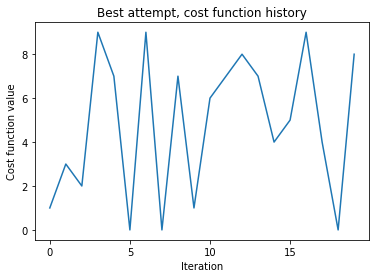

In [95]:
plt.title("Best attempt, cost function history")
plt.xlabel("Iteration")
plt.ylabel("Cost function value")
xticks_list = range(0, n_iter, 5)
plt.xticks(xticks_list)
plt.plot(cost_value_history)